<a href="https://colab.research.google.com/github/dhanushdc21/Linear-Regression/blob/main/01_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch workflow

In [ ]:
import torch
from torch import nn #nn contaions all of puytorchs building blocks
import matplotlib.pyplot as plt


## 1. *Data* (preparing and loading)

In [ ]:
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
### Splitting data to training and test sets

 #Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [ ]:
#Triain on 40 samples
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train)

40

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels= y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data,test_labels, c="g",label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r",s =4, label="Predictions")
  plt.legend(prop={"size": 14})

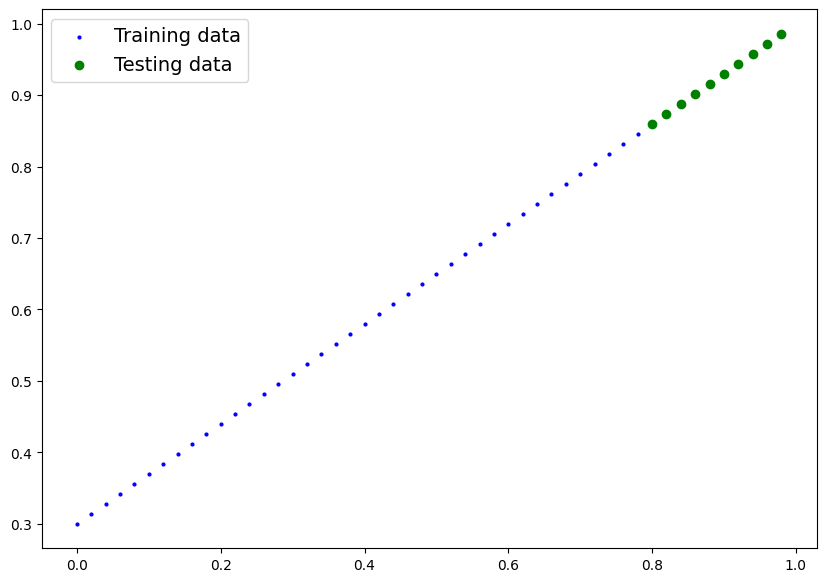

In [ ]:
plot_predictions();

###Byild model
#First PyTorch model
#Creating a linear regression model


Gradient descent, Backpropagation

In [ ]:
class LinearRegressionModel(nn.Module): # Almost everything from pytorch inherit from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype=torch.float))
    #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + bias #this is the linear regression formula


In [ ]:
#Torch.optim - Helps with gradient descent (Optimiser)
# def forward() - All nn.Module subclasses require you to overwrite forward()

### Checking the contents of our PyTOrch model

Now we have created out model but now lets check what is inside.

We can check what is inside out model using `.parameters()`

In [ ]:
#Create a random seed
torch.manual_seed(42)


#Create an instance of the model (This is subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
 #List named Parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#We need our model to make the values as close to the pre generated graph values.
weight,bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()

To check predicting lets see how well it predicts `y_test` based on `X_test`

It will run the `forward()` method

In [ ]:
with torch.inference_mode(): #Inference mode : disables all things which are used during training which helps less thing to run in background. Search..
  y_preds = model_0(X_test)

#with torch.no_grad() - Can also be used but inference mode is prefered

y_preds

tensor([[0.5694],
        [0.5761],
        [0.5828],
        [0.5896],
        [0.5963],
        [0.6030],
        [0.6098],
        [0.6165],
        [0.6232],
        [0.6300]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

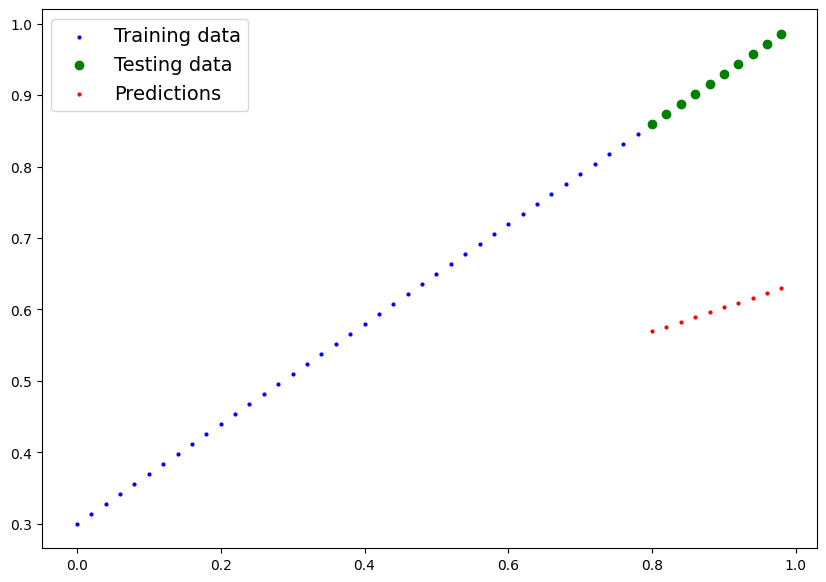

In [ ]:
plot_predictions(predictions=y_preds)

##An ideal model will replicate the known models.

##Training a model - To move a model from unknown parameters to known parameters.

Loss function of pytorch- Also called cost function or criterion,

 **A funciton to measure how wrong your models prediction are to an ideal model, the lower the better**

 Things we need to train :

 **Loss funciton**

 **Optimiser** - https://pytorch.org/docs/stable/optim.html#module-torch.optim

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###L1loss = Mean Absolute Error

In [ ]:
#Setup a loss funciton
loss_fn = nn.L1Loss()

#Set up an Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)  #Learning rate - is most important hyperparameter set by the user

Thw smaller the change the smaller the change in parameter, the larger the value of lr, the larger change in the value of parameter

###Building a training loop (and a testing loop) in  PyTorch

a couple things we need:

0. Loop through the data.

1. Forward pass (this involves data moving through our model's `forward()` functions) - also called forward propagation.

2. Calculate the loss (compare forward pass predictions to ground truth labels)

3. Optimizer zero grad

4. Lossbackward - move backward through the network to calculate the gradient of each of our parameters   of or model with respect to  loss. (**backpropagation**)

5. Optimizer step - use the optimizer to adjust our model's parameters to try an improve the loss. (**Graidient descent**)

In [ ]:
torch.manual_seed(42)
 # An epoch is one time through thr data... (hyperparameter because we set it ourselves)

epochs =100
epoch_count = []
loss_values = []
test_loss_values = []
###Training
 #0.Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch set all parameters that requires gradient to require gradients.

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(loss)
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes accumilates, so we have to zero it before the next iteration

  ### Testing
  model_0.eval() #turns off (dropout, etc,.) different settings in the model not needed for evaluation or testing.
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

  print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
model_0.state_dict()

tensor(0.1417, grad_fn=<MeanBackward0>)
Epoch: 0 | Loss: 0.14169074594974518 | Test loss: 0.3198745846748352
tensor(0.1402, grad_fn=<MeanBackward0>)
Epoch: 1 | Loss: 0.14016975462436676 | Test loss: 0.3164035975933075
tensor(0.1386, grad_fn=<MeanBackward0>)
Epoch: 2 | Loss: 0.13864876329898834 | Test loss: 0.3129325807094574
tensor(0.1371, grad_fn=<MeanBackward0>)
Epoch: 3 | Loss: 0.13712775707244873 | Test loss: 0.3094615936279297
tensor(0.1356, grad_fn=<MeanBackward0>)
Epoch: 4 | Loss: 0.1356067657470703 | Test loss: 0.305990606546402
tensor(0.1341, grad_fn=<MeanBackward0>)
Epoch: 5 | Loss: 0.1340857595205307 | Test loss: 0.30251961946487427
tensor(0.1326, grad_fn=<MeanBackward0>)
Epoch: 6 | Loss: 0.1325647532939911 | Test loss: 0.29904860258102417
tensor(0.1310, grad_fn=<MeanBackward0>)
Epoch: 7 | Loss: 0.13104376196861267 | Test loss: 0.29557764530181885
tensor(0.1295, grad_fn=<MeanBackward0>)
Epoch: 8 | Loss: 0.12952277064323425 | Test loss: 0.29210665822029114
tensor(0.1280, grad

OrderedDict([('weights', tensor([0.7033])), ('bias', tensor([0.1288]))])

Text(0.5, 0, 'Epoch')

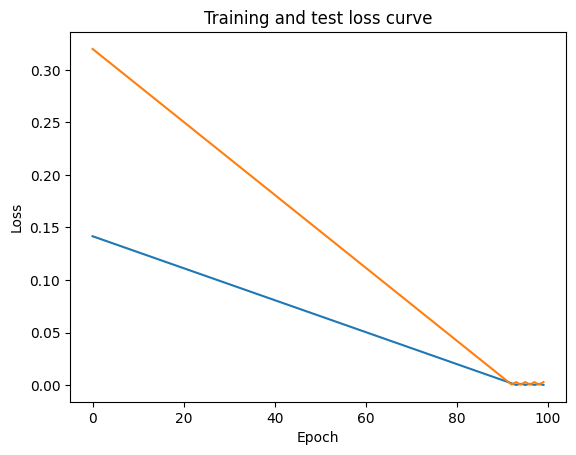

In [ ]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7033])), ('bias', tensor([0.1288]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7033])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7033])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

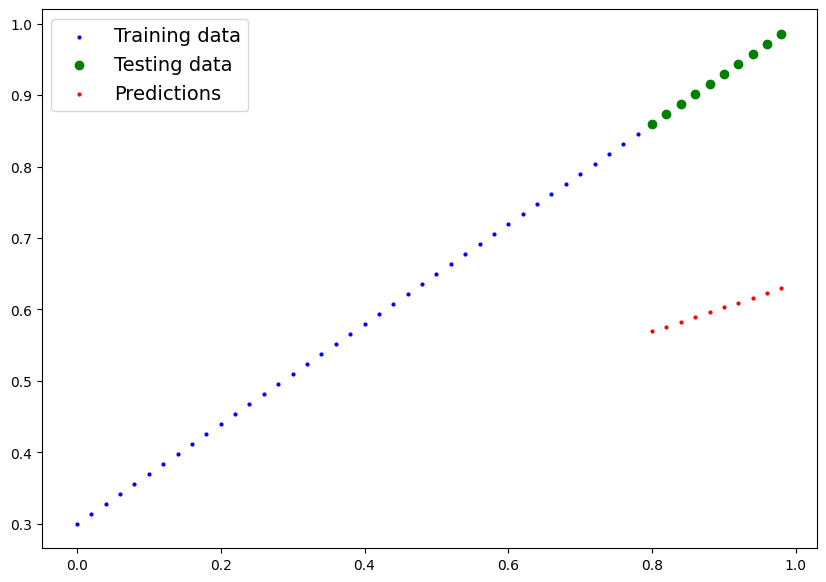

In [ ]:
plot_predictions(predictions = y_preds);

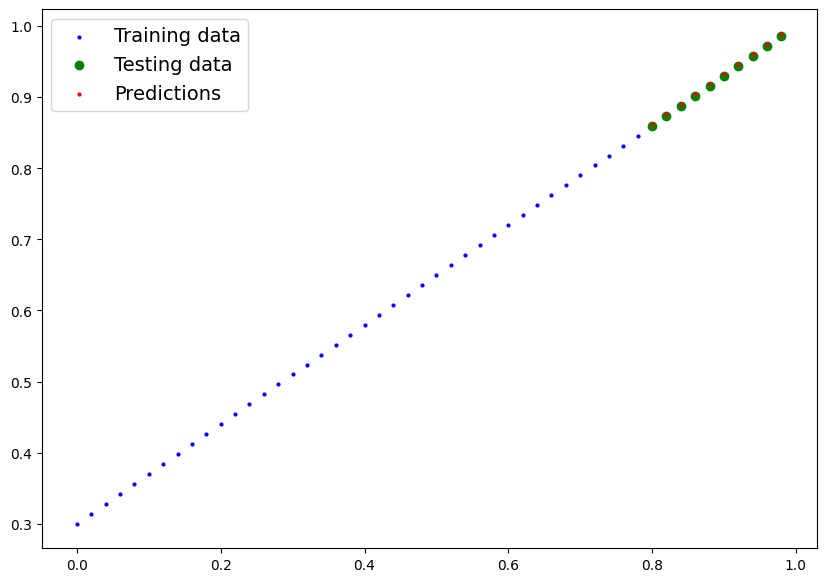

In [ ]:
plot_predictions(predictions = y_preds_new);

In [ ]:
epoch_count, loss_values

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 [tensor(0.1417, grad_fn=<MeanBackward0>),
  tensor(0.1402, grad_fn=<MeanBackward0>),
  tensor(0.1386, grad_fn=<MeanBackward0>),
  tensor(0.1371, grad_fn=<MeanBackward0>),
  tensor(0.1356, grad_fn=<MeanBackward0>),
  tensor(0.1341, grad_fn=<MeanBackward0>),
  tensor(0.1326, grad_fn=<MeanBackward0>),
  tensor(0.1310, grad_fn=<MeanBackward0>),
  tensor(0.1295, grad_fn=<MeanBackward0>),
  tensor(0.1280, grad_

####Saving a model in PyTorch

Three main methods for saving and loading.

1. `torch.save()`- Saves model in python pkl format.

2. `torch.load()`- Load a saved ojest

3. `torch.nn.Module.load_state_dict()`- This allows you ot load a model's saved state dictionary.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7033])), ('bias', tensor([0.1288]))])

In [ ]:
#Savign our PyTorch model

from pathlib import Path

#1. Create model directiory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_PyTorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_PyTorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Mar 19 18:22 01_PyTorch_workflow_model_0.pth


In [ ]:
##Loading a PyTorch Model

#To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7033])), ('bias', tensor([0.1288]))])

In [ ]:
# Make some preditions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8626],
        [0.8767],
        [0.8908],
        [0.9048],
        [0.9189],
        [0.9330],
        [0.9470],
        [0.9611],
        [0.9752],
        [0.9892]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
#Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8626],
        [0.8767],
        [0.8908],
        [0.9048],
        [0.9189],
        [0.9330],
        [0.9470],
        [0.9611],
        [0.9752],
        [0.9892]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

###**Puting everything together.**

In [ ]:
## Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt


Create device-agnostic code.

This means if we have access to a gpu, our code will use it (for potentially faster computing).

If no  GPU code defaults to using CPU.

In [ ]:
#Setup device-agonostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


###Data

In [ ]:
# Create data using Linear regression formula using y=a + bX , y= weight * X + bias
weight = 0.7
bias = 0.3

#Create range values
start = 0
end = 1
step = 0.02

#Create X and y (features)
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
#Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

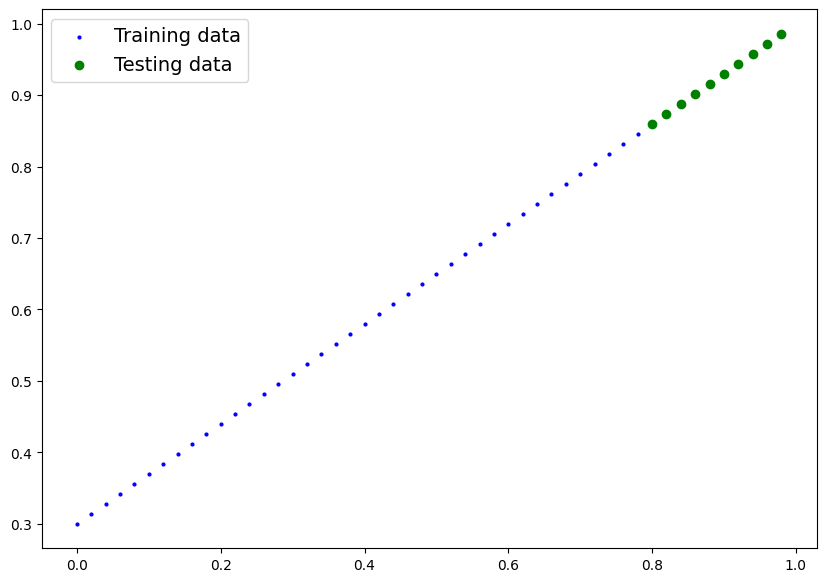

In [ ]:
# Plot data
#Note: if you dont have th eplot_predictions() funciton loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

#Building a PyTorch Linear model

In [ ]:
#Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features = 1, #Using a Pre-built feature
                                  out_features = 1)

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
#Check the device we are on
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
#Set the model to use the target device
model_1.to (device)
next(model_1.parameters()).device

device(type='cpu')

###Training

for traiing we need:

  * Loss function
  
  * Optimizer
  
  * Training loop
  
  * Testing loop

In [ ]:
#Setup loss function
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
#Lets write a training loop
torch.manual_seed(42)

epochs= 200

#Put data on target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. Do forward pass
  y_pred = model_1(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation
  loss.backward()

  #5.optimizer step
  optimizer.step()

  ###Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #Print

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.01380180753767

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### Making and evaluating prediction

In [ ]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

Check model predictions visually

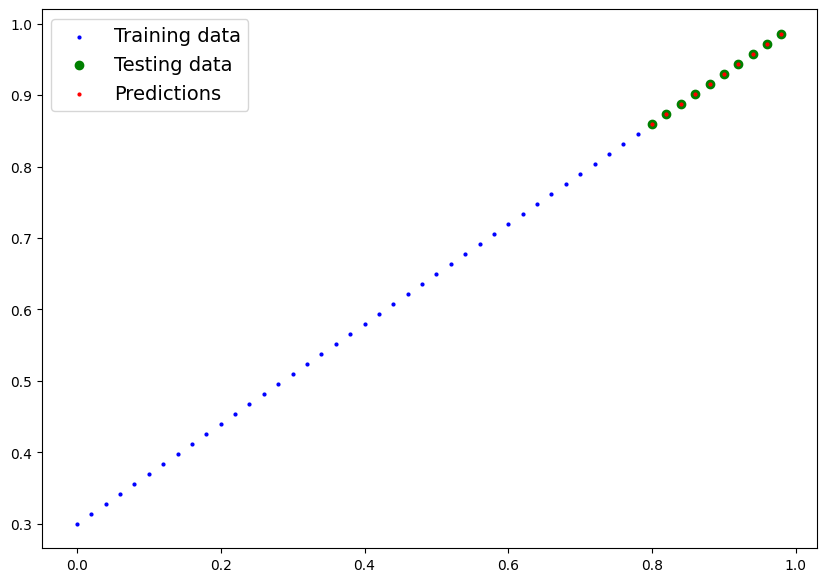

In [ ]:
plot_predictions(predictions=y_preds)

#Saving and loading a model


In [ ]:
from pathlib import Path

#Create models dictionary
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_1.pth


In [ ]:
#Load a model
loaded_model_1 = LinearRegressionModelV2()

#Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Put target modelm to the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
#Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])